In [12]:
import torch


***Gradient*** **Computation**

In this notebook, we continue our exploration of automatic differentiation in PyTorch by calculating the gradient of a function
𝑓
(
𝑥
,
𝑦
)
=
𝑥
2
+
𝑦
2
f(x,y)=x
2
 +y
2
 , and visualizing the function and its gradients.

We will also plot the function
𝑓
(
𝑥
,
𝑦
)
f(x,y) in 3D to understand the shape of the function.



In [13]:
# Define the input variables with requires_grad=True
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(1.0, requires_grad=True)


In [14]:
# Define the function f(x, y) = x^2 + y^2
f = x**2 + y**2

In [15]:
# Compute the gradients
f.backward()

In [18]:
# Print the gradients with respect to x and y
print(f"Gradient with respect to x: {x.grad}")
print(f"Gradient with respect to y: {y.grad}")

Gradient with respect to x: 2.0
Gradient with respect to y: 2.0


Explanation:
We define two variables,
𝑥
x and
𝑦
y, with requires_grad=True to enable gradient tracking.

We compute the function
𝑓
(
𝑥
,
𝑦
)
=
𝑥
2
+
𝑦
2
f(x,y)=x
2
 +y
2
 .

The .backward() call computes the gradients of
𝑓
f with respect to both
𝑥
x and
𝑦
y.

Finally, we print the gradients using .grad.



PLOTTING THE GRADIENTS

Now, we will visualize the function
𝑓
(
𝑥
,
𝑦
)
=
𝑥
2
+
𝑦
2
f(x,y)=x
2
 +y
2
  in 3D using matplotlib. This will give us an intuitive understanding of how the function behaves and how the gradients relate to the surface.

In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Create a grid of values for x and y
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)

In [21]:
# Calculate Z = X^2 + Y^2
Z = X**2 + Y**2

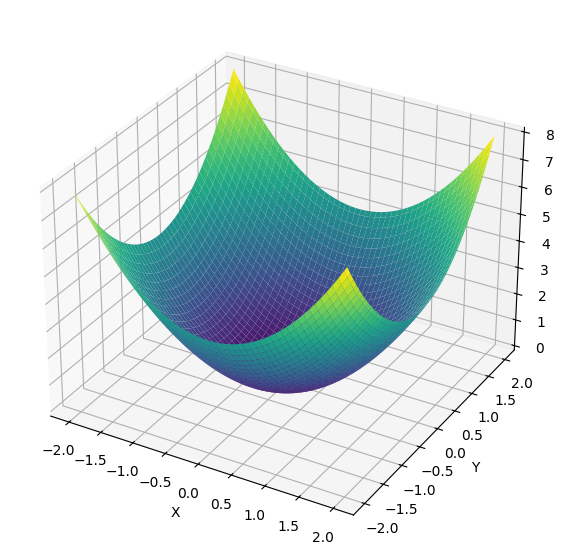

In [22]:
# Plot the function as a surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')

plt.show()


Explanation:
We create a grid of
𝑥
x and
𝑦
y values using np.meshgrid.

We compute
𝑍
=
𝑋
2
+
𝑌
2
Z=X
2
 +Y
2
 , which represents the function we want to visualize.

The surface plot is generated using ax.plot_surface() with a colormap (viridis).

We set axis labels and a title to make the plot more professional and easy to understand.


LEAF VS NON LEAF TENSOR

In [23]:
import torch

# Define a leaf tensor (directly created by the user)
x = torch.tensor(2.0, requires_grad=True)  # Leaf tensor

# Define a non-leaf tensor (created by an operation on a leaf tensor)
y = x**2  # Non-leaf tensor, derived from x

# Define another non-leaf tensor
z = y + 3  # Non-leaf tensor, derived from y

# Print whether the tensors are leaf tensors or not
print(f"Is x a leaf tensor? {x.is_leaf}")  # True
print(f"Is y a leaf tensor? {y.is_leaf}")  # False
print(f"Is z a leaf tensor? {z.is_leaf}")  # False

# Perform backward pass
z.backward()

# Print gradients
print(f"Gradient with respect to x: {x.grad}")


Is x a leaf tensor? True
Is y a leaf tensor? False
Is z a leaf tensor? False
Gradient with respect to x: 4.0


retain_grad

In [25]:
import torch

# Create leaf tensor
x = torch.tensor(2.0, requires_grad=True)

# Create non-leaf tensor by performing an operation
y = x**2

# Retain gradients for the non-leaf tensor
y.retain_grad()

# Perform backward pass
y.backward()

# Check gradients
print(f"Gradient for x: {x.grad}")
print(f"Gradient for y: {y.grad}")  # Now y has gradients due to retain_grad


Gradient for x: 4.0
Gradient for y: 1.0


Computation Graph


In [27]:
import torch

# Define tensors with requires_grad=True
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2  # y depends on x
z = y + 3   # z depends on y, which depends on x

# Perform backward pass
z.backward()

# Gradients are calculated for x, y, and z
print(f"x.grad: {x.grad}")
print(f"y.grad: {y.grad}")
print(f"z.grad: {z.grad}")


x.grad: 4.0
y.grad: None
z.grad: None


/tmp/ipython-input-27-2597061558.py:13: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  print(f"y.grad: {y.grad}")
/tmp/ipython-input-27-2597061558.py:14: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/p

Detach()

In [29]:
import torch

# Create a tensor with requires_grad
x = torch.tensor(2.0, requires_grad=True)

# Perform operations to create a computation graph
y = x**2  # Non-leaf tensor
z = y + 3  # Non-leaf tensor

# Perform backward on z
z.backward()

# Check gradients
print(f"x.grad: {x.grad}")  # Gradient for leaf tensor
print(f"y.grad: {y.grad}")  # Gradient for non-leaf tensor


x.grad: 4.0
y.grad: None


/tmp/ipython-input-29-2814949241.py:15: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  print(f"y.grad: {y.grad}")  # Gradient for non-leaf tensor


In [30]:
import torch

# Create a tensor with requires_grad
x = torch.tensor(2.0, requires_grad=True)

# Perform operations to create a computation graph
y = x**2  # Non-leaf tensor

# Detach y from the computation graph, but set requires_grad=True
y_detached = y.detach().requires_grad_(True)

# Perform another operation on detached tensor
z = y_detached + 3  # z is now part of the graph

# Perform backward on z
z.backward()

# Check gradients
print(f"x.grad: {x.grad}")        # Gradient for leaf tensor
print(f"y_detached.grad: {y_detached.grad}")  # Gradient for detached tensor


x.grad: None
y_detached.grad: 1.0
